In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6'])

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      4209 non-null   object
 1   X2      4209 non-null   object
 2   X3      4209 non-null   object
 3   X4      4209 non-null   object
 4   X5      4209 non-null   object
 5   X6      4209 non-null   object
dtypes: object(6)
memory usage: 197.4+ KB


In [16]:
data['X1'].unique().

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [11]:
for col in data.columns:
    print(col,':',len(data[col].unique()),'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [22]:
data["X2"].value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [14]:
data.index

RangeIndex(start=0, stop=4209, step=1)

In [15]:
# Select 10 most features group

data.X2.unique().sum()

'atavneasaqraiakmakaesfdagayacapgiawybaoalhxautanzahpamjqaflaacoar'

In [17]:
data.X2.value_counts().sort_values(ascending=False)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
d       18
ac      13
g       12
ap      11
y       11
x       10
aw       8
at       6
h        6
al       5
an       5
q        5
p        4
ah       4
av       4
au       3
am       1
j        1
af       1
l        1
aa       1
c        1
o        1
ar       1
Name: X2, dtype: int64

In [22]:
# Top 10 values

top_10=[x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]

In [23]:
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [25]:
for label in top_10:
    data[label]=np.where(data['X2']==label,1,0)
data[['X2']+top_10].head(10)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [31]:
def one_hot_top_x(data,variable,top_x_labels):
    #function to create dummy variable for the most frequent labels
    # we can vary the number of most frequent label that we encode
    for label in top_x_labels:
        data[variable+'_'+label]=np.where(data[variable]==label,1,0)
        
#read the data again
data=pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6'])

one_hot_top_x(data,'X2',top_10)
data.head()

one_hot_top_x(data,'X1',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_as,X1_ae,X1_ai,X1_m,X1_ak,X1_r,X1_n,X1_s,X1_f,X1_e
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      4209 non-null   object
 1   X2      4209 non-null   object
 2   X3      4209 non-null   object
 3   X4      4209 non-null   object
 4   X5      4209 non-null   object
 5   X6      4209 non-null   object
 6   X2_as   4209 non-null   int32 
 7   X2_ae   4209 non-null   int32 
 8   X2_ai   4209 non-null   int32 
 9   X2_m    4209 non-null   int32 
 10  X2_ak   4209 non-null   int32 
 11  X2_r    4209 non-null   int32 
 12  X2_n    4209 non-null   int32 
 13  X2_s    4209 non-null   int32 
 14  X2_f    4209 non-null   int32 
 15  X2_e    4209 non-null   int32 
 16  X1_as   4209 non-null   int32 
 17  X1_ae   4209 non-null   int32 
 18  X1_ai   4209 non-null   int32 
 19  X1_m    4209 non-null   int32 
 20  X1_ak   4209 non-null   int32 
 21  X1_r    4209 non-null   int32 
 22  X1_n    4209 non-null   

In [30]:
for label in top_10:
    data[label]=np.where(data['X1']==label,1,0)
data[['X1']+top_10].head(10)

,X1,as,ae,ai,m,ak,r,n,s,f,e
0,v,0,0,0,0,0,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,0,0,0,0,0,0
5,b,0,0,0,0,0,0,0,0,0,0
6,r,0,0,0,0,0,1,0,0,0,0
7,l,0,0,0,0,0,0,0,0,0,0
8,s,0,0,0,0,0,0,0,1,0,0
9,b,0,0,0,0,0,0,0,0,0,0


In [42]:
import datetime as dt

In [35]:
df_base=datetime.datetime.today()

In [36]:
df_base

datetime.datetime(2022, 12, 22, 19, 59, 4, 201995)

In [37]:
df_date_list=[df_base-datetime.timedelta(days=x) for x in range (0,20)]

In [38]:
df=pd.DataFrame(df_date_list)

In [39]:
df.columns=['day']

In [40]:
df

,day
0,2022-12-22 19:59:04.201995
1,2022-12-21 19:59:04.201995
2,2022-12-20 19:59:04.201995
3,2022-12-19 19:59:04.201995
4,2022-12-18 19:59:04.201995
5,2022-12-17 19:59:04.201995
6,2022-12-16 19:59:04.201995
7,2022-12-15 19:59:04.201995
8,2022-12-14 19:59:04.201995
9,2022-12-13 19:59:04.201995


In [48]:
#extract the week day name

df['day_of_week']=df['day'].dt.week

C:\Users\MODASUD\AppData\Local\Temp\ipykernel_3676\1492308049.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['day_of_week']=df['day'].dt.week


In [49]:
df.head()

,day,day_of_week
0,2022-12-22 19:59:04.201995,51
1,2022-12-21 19:59:04.201995,51
2,2022-12-20 19:59:04.201995,51
3,2022-12-19 19:59:04.201995,51
4,2022-12-18 19:59:04.201995,50


In [50]:
df['day_of_week'].unique()

array([51, 50, 49, 48], dtype=int64)

In [52]:
weekday_map={'51':1,
             '50':2,
              '49':3,
              '48':4}
df['day_ordinal']=df.day_of_week.map(weekday_map)

In [53]:
df.head()

,day,day_of_week,day_ordinal
0,2022-12-22 19:59:04.201995,51,NaN
1,2022-12-21 19:59:04.201995,51,NaN
2,2022-12-20 19:59:04.201995,51,NaN
3,2022-12-19 19:59:04.201995,51,NaN
4,2022-12-18 19:59:04.201995,50,NaN


In [63]:
df['day_ordinal']=df['day_of_week'].map({'51':1,'50':2,'49':3,'48':4})

In [64]:
df

,day,day_of_week,day_ordinal
0,2022-12-22 19:59:04.201995,NaN,NaN
1,2022-12-21 19:59:04.201995,NaN,NaN
2,2022-12-20 19:59:04.201995,NaN,NaN
3,2022-12-19 19:59:04.201995,NaN,NaN
4,2022-12-18 19:59:04.201995,NaN,NaN
5,2022-12-17 19:59:04.201995,NaN,NaN
6,2022-12-16 19:59:04.201995,NaN,NaN
7,2022-12-15 19:59:04.201995,NaN,NaN
8,2022-12-14 19:59:04.201995,NaN,NaN
9,2022-12-13 19:59:04.201995,NaN,NaN


In [2]:
data=pd.read_excel('titanic.xlsx')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [6]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Missing Data not at random

In [7]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [9]:
data['Cabin_null']=np.where(data['Cabin'].isnull(),1,0)

In [11]:
data['Cabin_null'].index

RangeIndex(start=0, stop=891, step=1)

In [12]:
data['Cabin_null'].mean()

0.7710437710437711

In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [42]:
data['Cabin_null']

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: Cabin_null, Length: 891, dtype: int32

In [15]:
data.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# All technique to repleace of handling missing value
Mean/Median/Mode 
Random sample imputation

In [5]:
data=pd.read_excel('titanic.xlsx', usecols=['Age','Fare','Survived'])

In [17]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [19]:
def impute_nan(df,variable, median):
    df[variable+"_median"]=df[variable].fillna(median)

In [20]:
median=data.Age.median()

In [21]:
median

28.0

In [22]:
impute_nan(data,'Age',median)

In [23]:
data.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [24]:
data['Age'].std()

14.526497332334044

In [25]:
data["Age_median"].std()

13.019696550973194

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.lines.Line2D at 0x1ee3a4a4fa0>,
 ['Age', 'Age_median'])

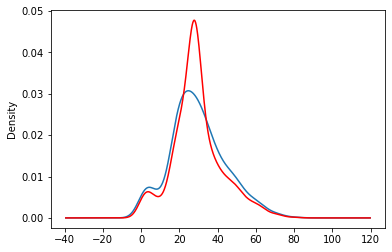

In [28]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
data['Age'].plot(kind='kde', ax=ax) 
data.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.get_legend_handles_labels()


## Feature engineering
    ## Rabdom Sample Imputation

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [16]:
def impute_nan(df,variable, median):
    data[variable+"_median"]=df[variable].fillna(median)
    data[variable+"_random"]=df[variable]
    ##It will have a random sample to fill the na
    random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    ##Pandas needs to have same index in order to merge the dataset
    random_sample.index=data[data[variable].isnull()].index
    data.loc[df[variable].isnull(),variable+'_random']=random_sample

In [12]:
median=data.Age.median()
median

28.0

In [17]:
impute_nan(data,"Age",median)

In [8]:
data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [18]:
data.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [20]:
data['Age_median'].mean()

29.36158249158249

In [22]:
data['Age_random'].mean()

29.700347923681257

In [23]:
data['Age'].mean()

29.69911764705882

In [24]:
import matplotlib.pyplot as plt

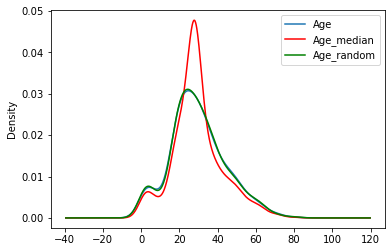

In [28]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
data['Age'].plot(kind='kde', ax=ax)
data.Age_median.plot(kind='kde', ax=ax, color='red')
data.Age_random.plot(kind='kde', ax=ax, color='green') 
lines, labels = ax.get_legend_handles_labels()
ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Capturing Nan value with a new feature

In [31]:
df=pd.read_excel('titanic.xlsx', usecols=['Age','Fare','Survived'])

In [32]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
df['Age_Nan']=np.where(df["Age"].isnull(),1,0)

In [37]:
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [38]:
df.Age_Nan.mean()

0.19865319865319866

In [44]:
df['Age_median']=df['Age'].fillna(df['Age'].median())

In [45]:
df['Age_median']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age_median, Length: 891, dtype: float64

In [43]:
df.Age.mean()
df.Age.median()

28.0

In [42]:
df.Age.isnull().sum()

177

In [47]:
df['Age_median'].mean()

29.36158249158249

In [46]:
df.head()

,Survived,Age,Fare,Age_Nan,Age_median
0,0,22.0,7.2500,0,22.0
1,1,38.0,71.2833,0,38.0
2,1,26.0,7.9250,0,26.0
3,1,35.0,53.1000,0,35.0
4,0,35.0,8.0500,0,35.0


    #End of Distribution

In [48]:
df=pd.read_excel('titanic.xlsx', usecols=['Age','Fare','Survived'])

In [50]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

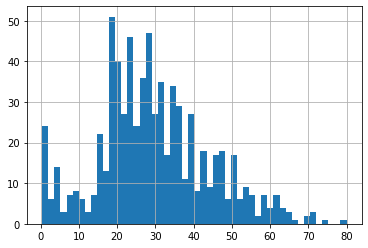

In [52]:
df.Age.hist(bins=50)

In [59]:
extreme=df.Age.mean()+3*df.Age.std()

In [57]:
import seaborn as sns

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

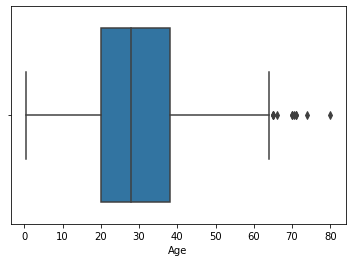

In [58]:
sns.boxplot('Age',data=df)

In [63]:
def impute_nan(df, variable,median,extreme):
    df[variable+'_enddistribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [64]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [65]:
df.head()

,Survived,Age,Fare,Age_enddistribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

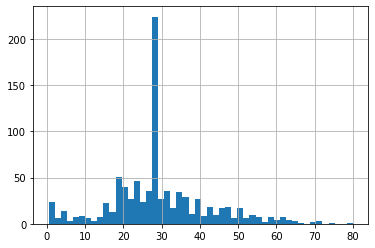

In [66]:
df["Age"].hist(bins=50)

C:\Users\MODASUD\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_enddistribution'>

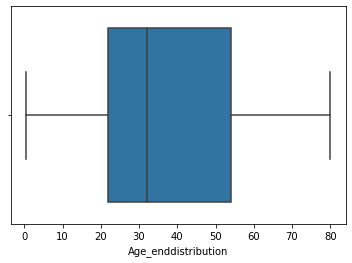

In [68]:
sns.boxplot('Age_enddistribution',data=df)

AttributeError: 'DataFrame' object has no attribute 'Age_median'

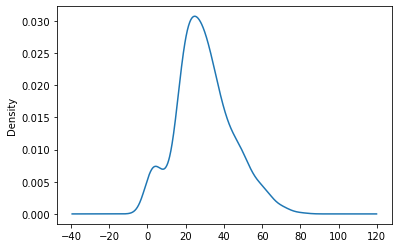

In [71]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
data['Age'].plot(kind='kde', ax=ax)
data.Age_median.plot(kind='kde', ax=ax, color='red')
data.Age_random.plot(kind='kde', ax=ax, color='green')
##data.Age_mean(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

    #Day 3 Feature engineering

        #Arbitary value Imputation 

In [72]:
df=pd.read_excel('titanic.xlsx', usecols=['Age','Fare','Survived'])

In [73]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


    #Categorical Features
    How to handle missing value in categorical variable

        # Frequent catergory Imputation

In [117]:
df= pd.read_csv("loan.csv",usecols=["BsmtQual",'FireplaceQu','GarageType','SalePrice'])

In [118]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [119]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [81]:
df.isnull().mean().sort_values(ascending=True)

Fireplaces    0.000000
SalePrice     0.000000
BsmtQual      0.025342
GarageType    0.055479
dtype: float64

In [83]:
df.shape

(1460, 4)

#As this dataset has less no of missing value, we can replace with most occuring value

            #Compute the frequesnt

In [84]:
df["BsmtQual"].index

RangeIndex(start=0, stop=1460, step=1)

<AxesSubplot:>

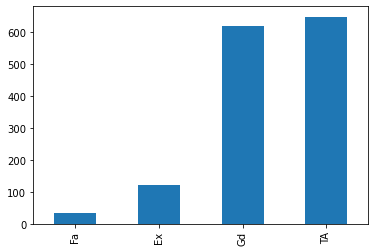

In [108]:
df['BsmtQual'].value_counts(ascending=True).plot.bar()

In [111]:
df["GarageType"].value_counts().index[0]

'Attchd'

<AxesSubplot:>

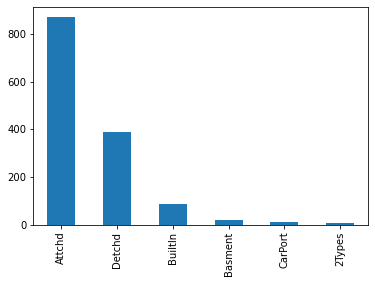

In [109]:
df["GarageType"].value_counts().plot.bar()

In [114]:
### Replacing function 

def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [127]:
impute_nan(df,'BsmtQual')

In [120]:
impute_nan(df,'FireplaceQu')

In [121]:
impute_nan(df,'GarageType')
SalePrice

In [124]:
df.head().isnull().value_counts()

BsmtQual  FireplaceQu  GarageType  SalePrice
False     False        False       False        5
dtype: int64

In [131]:
 df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [130]:
df["BsmtQual"].isnull().value_counts()

False    1460
Name: BsmtQual, dtype: int64

In [138]:
df= pd.read_csv("loan.csv",usecols=["BsmtQual",'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [139]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [140]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [143]:
df['BsmtQual'].mode()[0]

'TA'

In [144]:
frequent=df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)

In [150]:
df.head().isnull().value_counts().sum()

5

In [152]:
df['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [154]:
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [155]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,Gd,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [3]:
df= pd.read_csv("loan.csv",usecols=["BsmtQual",'FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [5]:
impute_nan(df,"BsmtQual")

In [6]:
impute_nan(df,"FireplaceQu")

In [7]:
impute_nan(df,"GarageType")

In [8]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [11]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1,inplace=True)

In [12]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


    #Handle categorical features
    One hot encoding
`

In [13]:
import pandas as pd

In [17]:
df=pd.read_excel('titanic.xlsx',usecols=['Sex'])

In [18]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [21]:
df['Sex_dummies']=pd.get_dummies(df,drop_first=True).head()

In [22]:
df=pd.read_excel('titanic.xlsx',usecols=['Embarked'])

In [23]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [24]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df['Embarked'].mean()

TypeError: can only concatenate str (not "int") to str

In [32]:
df['Embarked'].isnull().replace("Missing")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [33]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df=pd.read_csv('mercedesbenz.csv',usecols=['X0','X1',"X2",'X3','X4','X5','X6'])

In [35]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X0      4209 non-null   object
 1   X1      4209 non-null   object
 2   X2      4209 non-null   object
 3   X3      4209 non-null   object
 4   X4      4209 non-null   object
 5   X5      4209 non-null   object
 6   X6      4209 non-null   object
dtypes: object(7)
memory usage: 230.3+ KB


In [37]:
df.index

RangeIndex(start=0, stop=4209, step=1)

In [38]:
df.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [40]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [43]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [44]:
list_10=df.X1.value_counts().sort_values(ascending=False).head(10).index

In [46]:
list_10=list(list_10)

In [47]:
list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [49]:
for categories in list_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [50]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [51]:
list_10.append('X1')

In [52]:
df[list_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


   # Day 4

In [ ]:
#Ordinal number encoding

In [70]:
import datetime as dt

In [57]:
today_date=datetime.datetime.today()

In [58]:
today_date

datetime.datetime(2022, 12, 25, 9, 47, 42, 488267)

In [60]:
today_date-datetime.timedelta(3)

datetime.datetime(2022, 12, 22, 9, 47, 42, 488267)

In [62]:
##List comprehension

days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [64]:
data=pd.DataFrame(days)

In [65]:
data.columns=['Day']

In [79]:
data.head()

,Day
0,2022-12-25 09:47:42.488267
1,2022-12-24 09:47:42.488267
2,2022-12-23 09:47:42.488267
3,2022-12-22 09:47:42.488267
4,2022-12-21 09:47:42.488267


In [93]:
data['Day_new']=data['Day'].dt.isocalendar().day

In [94]:
data['Day_new']

0     7
1     6
2     5
3     4
4     3
5     2
6     1
7     7
8     6
9     5
10    4
11    3
12    2
13    1
14    7
Name: Day_new, dtype: UInt32

In [95]:
dictionary={1:'Monday',2:'Tuesday',3:'Wednesday',4:"Thursday",5:'Friday',6:'Saturday',7:"Sunday"}

In [96]:
dictionary

{1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday',
 7: 'Sunday'}

In [97]:
data['New order']=data['Day_new'].map(dictionary)

In [98]:
data['New order']

0        Sunday
1      Saturday
2        Friday
3      Thursday
4     Wednesday
5       Tuesday
6        Monday
7        Sunday
8      Saturday
9        Friday
10     Thursday
11    Wednesday
12      Tuesday
13       Monday
14       Sunday
Name: New order, dtype: object

In [99]:
data

,Day,Day_new,New order
0,2022-12-25 09:47:42.488267,7,Sunday
1,2022-12-24 09:47:42.488267,6,Saturday
2,2022-12-23 09:47:42.488267,5,Friday
3,2022-12-22 09:47:42.488267,4,Thursday
4,2022-12-21 09:47:42.488267,3,Wednesday
5,2022-12-20 09:47:42.488267,2,Tuesday
6,2022-12-19 09:47:42.488267,1,Monday
7,2022-12-18 09:47:42.488267,7,Sunday
8,2022-12-17 09:47:42.488267,6,Saturday
9,2022-12-16 09:47:42.488267,5,Friday


       ### Count of Frequency encoding

In [134]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,index_col=None)


In [135]:
train_set.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [129]:
train_set.info

<bound method DataFrame.info of          Employement      Degree               Status         Designation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

       Family_job    Race      Sex         Country  
0   Not-in-family   White     Male   United-States  
1         Husband   White     Male   United-States  
2   Not-in-family   White     Male   United-States  
3         Husband   Black     Male   United-States  
4            Wife   Black   Female            Cuba  >

In [102]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [139]:
columns=[1,3,5,6,7,8,9,13]

In [141]:
train_set=train_set[columns]

In [138]:
train_set.columns=["Employement",'Degree','Status','Designation','Family_job','Race','Sex','Country']

ValueError: Length mismatch: Expected axis has 15 elements, new values have 8 elements

In [131]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Employement  5 non-null      object
 1   Degree       5 non-null      object
 2   Status       5 non-null      object
 3   Designation  5 non-null      object
 4   Family_job   5 non-null      object
 5   Race         5 non-null      object
 6   Sex          5 non-null      object
 7   Country      5 non-null      object
dtypes: object(8)
memory usage: 448.0+ bytes


In [143]:
train_set.columns=["Employement",'Degree','Status','Designation','Family_job','Race','Sex','Country']

In [144]:
train_set.index

RangeIndex(start=0, stop=32561, step=1)

In [147]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employement : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
Family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [148]:
train_set["Country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [150]:
df['Country']

KeyError: 'Country'

In [156]:
country_map=train_set['Country'].value_counts().to_dict()

In [157]:
train_set['Country']=train_set['Country'].map(country_map)

In [158]:
train_set.head()

,Employement,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


In [159]:
df=pd.read_excel('titanic.xlsx', usecols=['Cabin','Survived'])

In [160]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [161]:
df['Cabin'].fillna('Missing')

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

In [164]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [163]:
df["Cabin"].astype(str).str[0]

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: Cabin, Length: 891, dtype: object

In [167]:
df["Cabin"].fillna("Missing",inplace=True)

In [174]:
df['Cabin']=df["Cabin"].astype(str).str[0]

In [173]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [175]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [176]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [183]:
ordinal_label=df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [188]:
ordinal_label

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [186]:
dic={'T':0, 'M':1, 'A':2, 'G':3, 'C':4, 'F':5, 'B':6, 'E':7, 'D':8 }

In [191]:
dic

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [192]:
df['Cabin_ordinallabel']=df['Cabin'].map(dic)

In [194]:
df.head(10)

,Survived,Cabin,Cabin_ordinallabel
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
5,0,M,1
6,0,E,7
7,0,M,1
8,1,M,1
9,1,M,1


        #Mean encoding

In [197]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [198]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [199]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)

In [200]:
df.head()

,Survived,Cabin,Cabin_ordinallabel,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


        #    #Probability Ration Encoding

In [201]:
df=pd.read_excel('titanic.xlsx', usecols=['Cabin','Survived'])

In [202]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [203]:
df["Cabin"].fillna('Missing',inplace=True)

In [204]:
df['Cabin']

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Survived        891 non-null    int64 
 1   Cabin           891 non-null    object
 2   Cabin_category  891 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [238]:
df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [239]:
df['Cabin'].unique().astype(str)

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [240]:
df['Cabin'].unique().astype(str)

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [243]:
df['Cabin']=df["Cabin"].str[0]

In [244]:
df['Cabin']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [246]:
prob_dis=df.groupby(['Cabin'])['Survived'].mean()

In [248]:
prob_dis=pd.DataFrame(prob_dis)

In [249]:
prob_dis

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [250]:
prob_dis['Died']=1-prob_dis['Survived']

In [251]:
prob_dis['Probability_ratio']=prob_dis['Survived']/prob_dis['Died']

In [253]:
prob_encoded=prob_dis["Probability_ratio"].to_dict()

In [254]:
df["Cabin_encoded"]=df["Cabin"].map(prob_encoded)

In [255]:
df.head()

,Survived,Cabin,Cabin_category,Cabin_encoded
0,0,M,Missing,0.428274
1,1,C,C85,1.458333
2,1,M,Missing,0.428274
3,1,C,C123,1.458333
4,0,M,Missing,0.428274


In [ ]:
##Replace the coloumn of cabin with the cabin_encoded for model preparation

    ##Normalization & Standardzition

In [3]:
df=pd.read_excel('titanic.xlsx', usecols=["Pclass",'Age','Fare','Survived'])

In [257]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [258]:
df.mean()

Survived     0.383838
Pclass       2.308642
Age         29.699118
Fare        32.204208
dtype: float64

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [260]:
df['Age'].fillna(df["Age"].median(),inplace=True)

In [263]:
df.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

    ##Standarisation : We use standard Scaler
    

In [2]:
from sklearn.preprocessing import StandardScaler

In [265]:
scaler=StandardScaler()
#fit vs fit_transform()

In [ ]:
df_scaled

In [271]:
pd.DataFrame(df_scaled).head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [272]:
df_scaled=scaler.fit_transform(df)

In [273]:
pd.DataFrame(df_scaled).head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

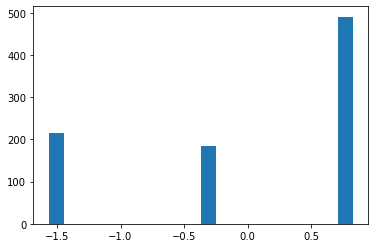

In [277]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

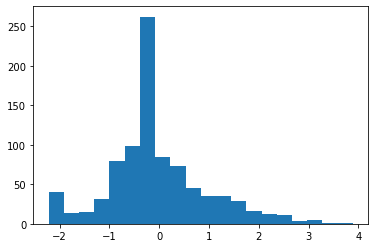

In [278]:
plt.hist(df_scaled[:,2],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

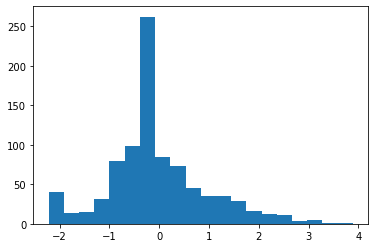

In [279]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

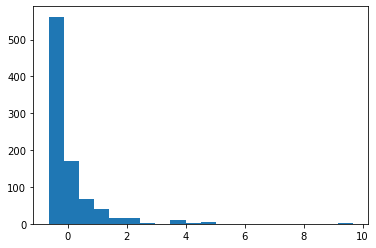

In [280]:
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

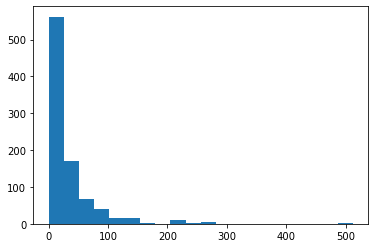

In [281]:
plt.hist(df['Fare'],bins=20)

    ###Min Max Scalling

In [282]:
 from sklearn.preprocessing import MinMaxScaler

In [283]:
min_max=MinMaxScaler()

In [284]:
min_max

MinMaxScaler()

In [285]:
(min_max.fit_transform(df))

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        , 0.34656949, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [286]:
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

In [288]:
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

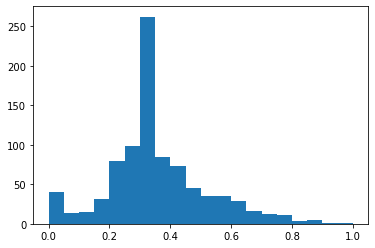

In [289]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

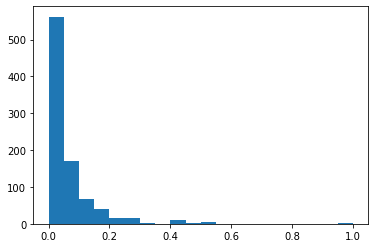

In [290]:
plt.hist(df_minmax['Fare'],bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

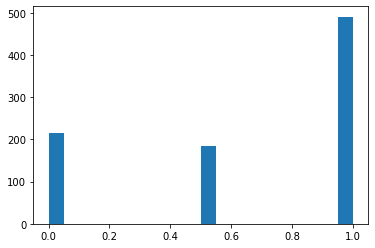

In [291]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

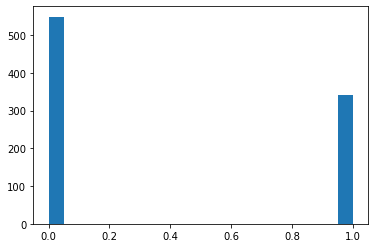

In [292]:
plt.hist(df_minmax['Survived'],bins=20)

#####Robust Scaler

In [18]:
from sklearn.preprocessing import RobustScaler

In [24]:
scaler=RobustScaler()

In [25]:
df_robust_scaler=pd.Dataframe(scaler.fit_transform(df),columns=df.columns)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [23]:
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

NameError: name 'scaler' is not defined

In [303]:
df_robust_scaler

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


In [22]:
plt.hist(df_robust_scaler['Survived'],bins=20)

NameError: name 'df_robust_scaler' is not defined

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

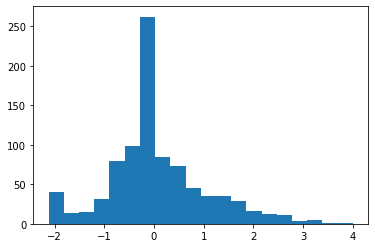

In [306]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

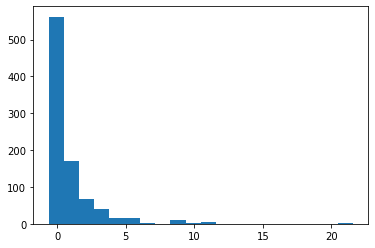

In [307]:
plt.hist(df_robust_scaler['Fare'],bins=20)

In [8]:
df=pd.read_excel('titanic.xlsx', usecols=['Age','Fare','Survived'])

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [11]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [16]:
import scipy.stats as stat
import pylab

In [15]:
##Q - Q plot

def plot_data(df,variable):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[variable],dist='norm',plot=pylab)
    plt.show()
    

In [14]:
plot_data(df,'Age')

NameError: name 'plt' is not defined

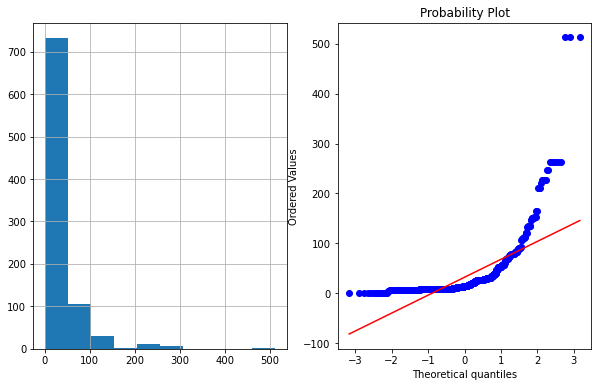

In [324]:
plot_data(df,'Fare')

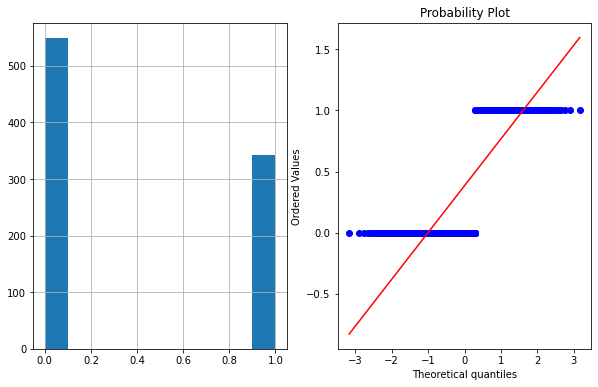

In [21]:
plot_data(df,'Survived')

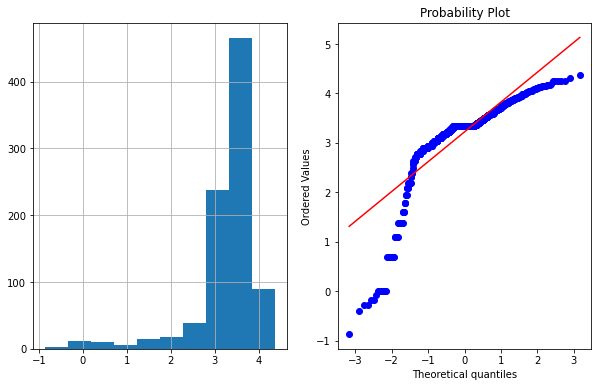

In [20]:
df['Age_log']=np.log(df["Age"])
plot_data(df,'Age_log')

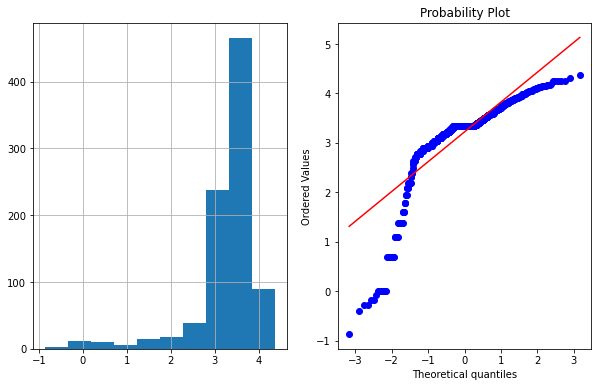

In [27]:
import sklearn.preprocessing as l

df["Age_log"]=np.log(df['Age'])
plot_data(df,'Age_log')

C:\Users\MODASUD\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyError: 'Fare_log'

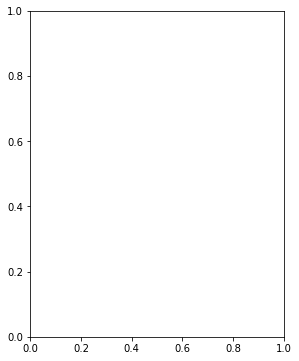

In [28]:
df["fare_log"]=np.log(df['Fare'])
plot_data(df,'Fare_log')

In [29]:
np.log(df['Fare'])

C:\Users\MODASUD\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

### Reciprocal Transformation

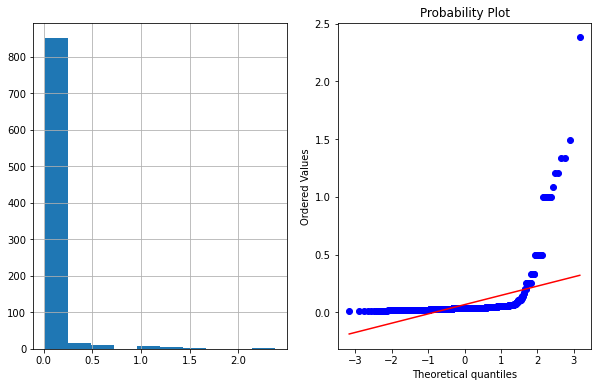

In [30]:
df["Age_reciprocal"]=1/df.Age
plot_data(df,'Age_reciprocal')

## The output is not in straight line hence we wont be able to consider this algorithm.

# Sqrt Transformation

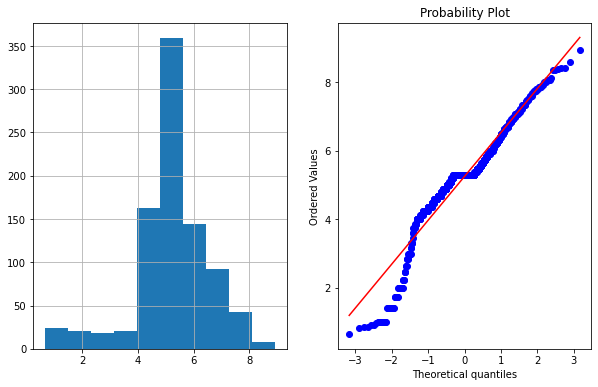

In [31]:
df['Age_square']=df.Age**(1/2)
plot_data(df,"Age_square")

    ##Exponential Transformation

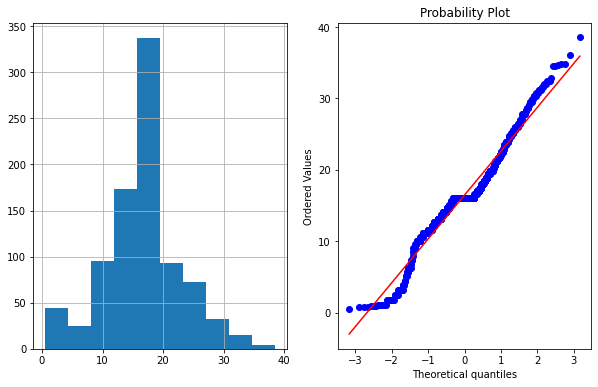

In [32]:
df['Age_expo']=df.Age**(1/1.2)
plot_data(df,"Age_expo")

## BoxCox Tranformation

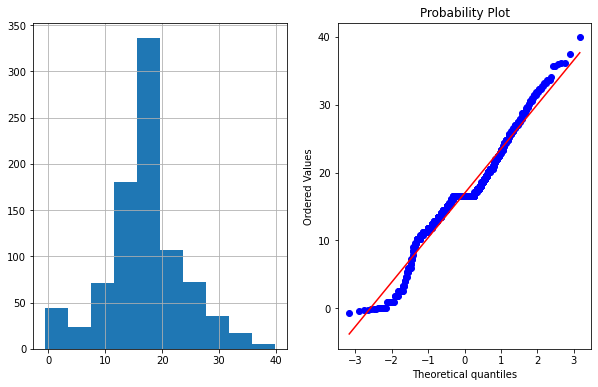

In [36]:
df['age_Boxcox'],parameter=stat.boxcox(df['Age'])
plot_data(df,"age_Boxcox")

In [35]:
print(parameter)

0.7964531473656952


    ### Fare 
  df['Age_expo']=df.Age**(1/1.2)
plot_data(df,"Age_expo")

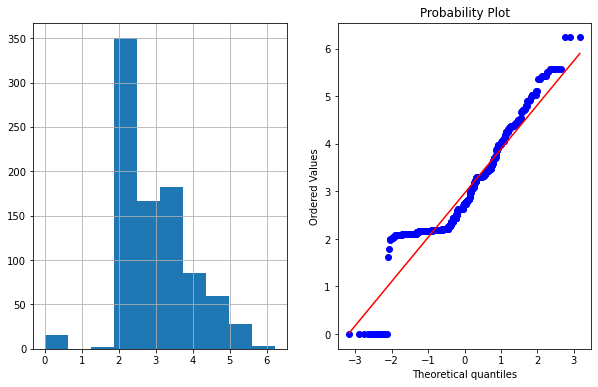

In [39]:
df['Log_data']=np.log1p(df["Fare"])
plot_data(df,"Log_data")

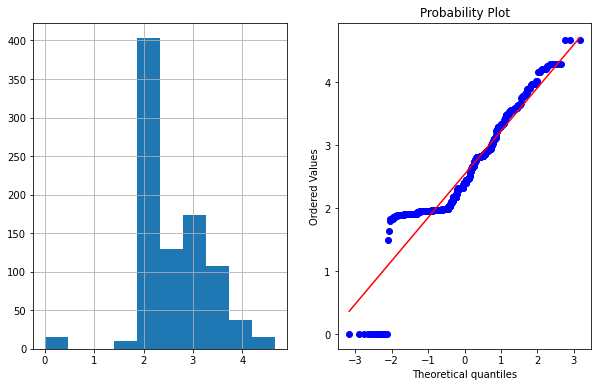

In [41]:
df['fare_Boxcox'],parameter=stat.boxcox(df['Fare']+1)
plot_data(df,"fare_Boxcox")

## Outlier & Impact on ML

In [2]:
df=pd.read_excel('titanic.xlsx')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


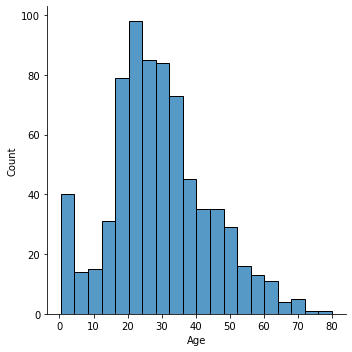

In [5]:
sns.displot(df['Age'].dropna())

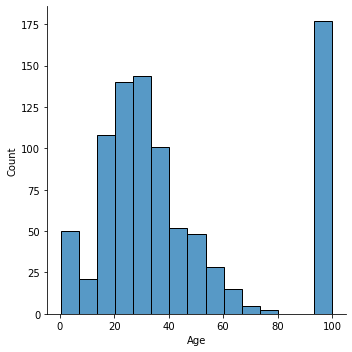

In [6]:
sns.displot(df['Age'].fillna(100))

In [ ]:
##Gaussian distribution

Text(0.5, 0, 'No of passenger')

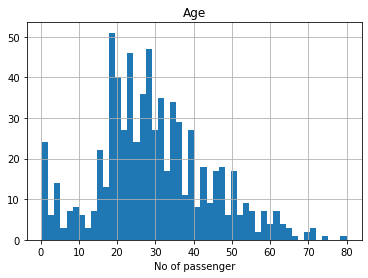

In [8]:
figure=df.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel('Age')
figure.set_xlabel("No of passenger")

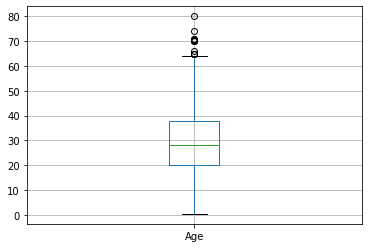

In [9]:
figure=df.boxplot(column='Age')

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
###Assuming age follows Gaussian distribution we will calculate the boundaries which diffentiates the outlier

In [11]:
df['Age'].mean()

29.69911764705882

In [12]:
df['Age'].std()

14.526497332334044

In [13]:
upper_boundary=df['Age'].mean() + 3*df['Age'].std() 

In [14]:
upper_boundary

73.27860964406095

In [15]:
lower_boundary=df['Age'].mean() - 3*df['Age'].std() 

In [16]:
lower_boundary

-13.88037434994331

## compute the iQr


In [18]:
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

17.875

In [21]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-6.6875
64.8125


(None, None)

    #Extreme Outlier

In [23]:
lower_bridge1=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge1=df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge1),print(upper_bridge1)

-33.5
91.625


(None, None)

Text(0.5, 0, 'fare per person')

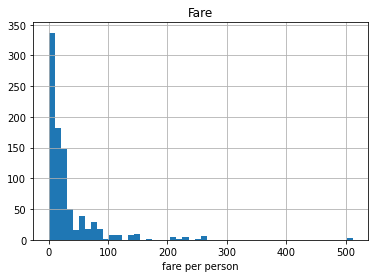

In [24]:
figure=df.Fare.hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel('Fare')
figure.set_xlabel("fare per person")

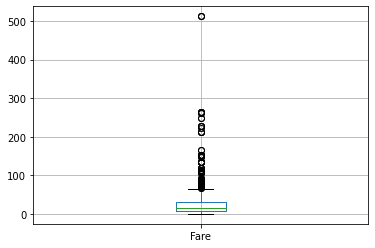

In [25]:
figure=df.boxplot(column='Fare')

In [26]:
IQR=df.Fare.quantile(0.75)-df.Age.quantile(0.25)
IQR

10.875

In [34]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-8.4021
47.3125


(None, None)

In [33]:
lower_bridge1=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge1=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge1),print(upper_bridge1)

-24.7146
63.625


(None, None)

In [32]:
upper_boundary=df['Fare'].mean() + 3*df['Age'].std() 
lower_boundary=df['Age'].mean() - 3*df['Age'].std() 
print(upper_boundary),print(lower_boundary),df['Fare'].mean()

75.78369996557673
-13.88037434994331


(None, None, 32.2042079685746)

In [35]:
data=df.copy()

In [44]:
data.loc[data['Age']>73,'Age']=73

In [38]:
data.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [40]:
data.loc[data['Fare']>100,'Fare']=100

Text(0.5, 0, 'fare per person')

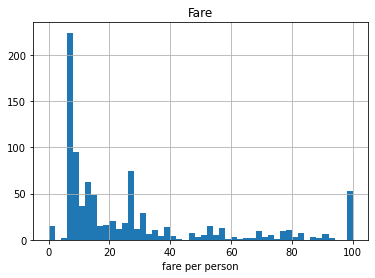

In [42]:
figure=data.Fare.hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel('Fare')
figure.set_xlabel("fare per person")

Text(0.5, 0, 'Age per person')

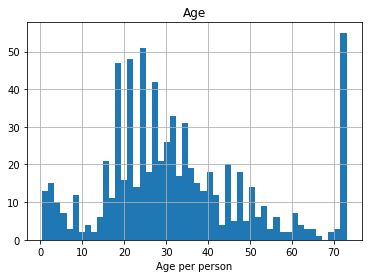

In [45]:
figure=data.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel('Age')
figure.set_xlabel("Age per person")

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(data[['Age','Fare']].fillna(0),data["Survived"],test_size=0.3)

In [48]:
##Logistic Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
Y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accurracy_score {}".format(accuracy_score(Y_test,Y_pred)))
print("roc_auc_score {}".format(roc_auc_score(Y_test,Y_pred1[:,1])))


Accurracy_score 0.6865671641791045
roc_auc_score 0.6875147649421214


In [49]:
##Random forest  Regression

from sklearn.ensemble import RandomForestClassifier


classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
Y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accurracy_score {}".format(accuracy_score(Y_test,Y_pred)))
print("roc_auc_score {}".format(roc_auc_score(Y_test,Y_pred1[:,1])))

Accurracy_score 0.664179104477612
roc_auc_score 0.6949858256555634
